In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from pyCascade import probePost, physics, utils
from matplotlib import pyplot as plt
import numpy as np
import os
from IPython.core.debugger import set_trace
import pandas as pd

category =  "config1"

############ Universal ################
scratch_home = os.getenv('SCRATCH') #need to set SCRATCH (even if there is no real SCRATCH) to the location where results are written
scratch_dir = f'{scratch_home}/Cascade/city_block_cfd'
home_dir = !pwd
home_dir = home_dir[0]

display(scratch_dir)
display(home_dir)

'/Users/nicholasbachand/Documents/Research/Cascade/city_block_cfd'

'/Users/nicholasbachand/Documents/Research/Cascade/city_block_cfd'

In [21]:
data_dict.keys()

dict_keys(['R2', 'R3', 'R4', 'R5'])

NameError: name 'new_s' is not defined

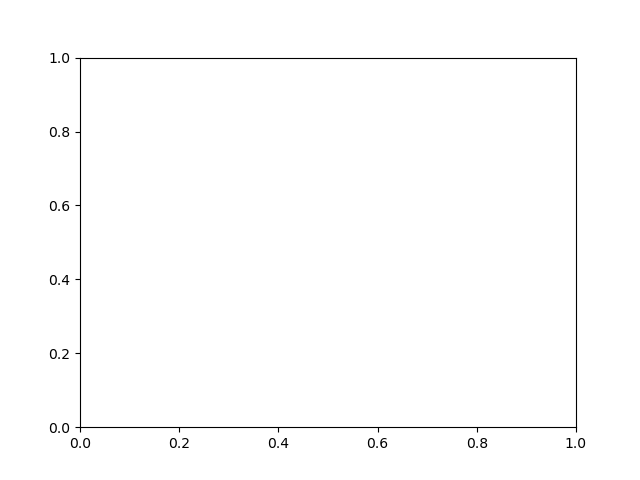

In [44]:
for table_name, df in data_dict['R2'].items():
    fig, ax = plt.subplots()
    no_skylight = []
    skylight = []
    for name in df.index.values:
        if "_skylight" in name:
            new_name = ""
            for c in name:
                if c.isdigit():
                    new_s += c
                    if len(new_s) == 2:
                        break
            skylight.append(new_name)
        else:
            no_skylight.append(name)

    x1 = df.loc[skylight].index
    x2 = [i + 0.4 for i in range(len(x1))]
    y1 = df.loc[skylight].values.flatten()
    y2 = df.loc[no_skylight].values.flatten()
    ax.bar(x1, y1, width=0.4, label='skylight')
    if len(y2) > 0:
        ax.bar(x2, y2, width=0.4, label='no_skylight')
        ax.set_xticks([i + 0.2 for i in range(len(x1))])
    ax.set_xticklabels(x1)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.legend()

plt.tight_layout()
plt.show()

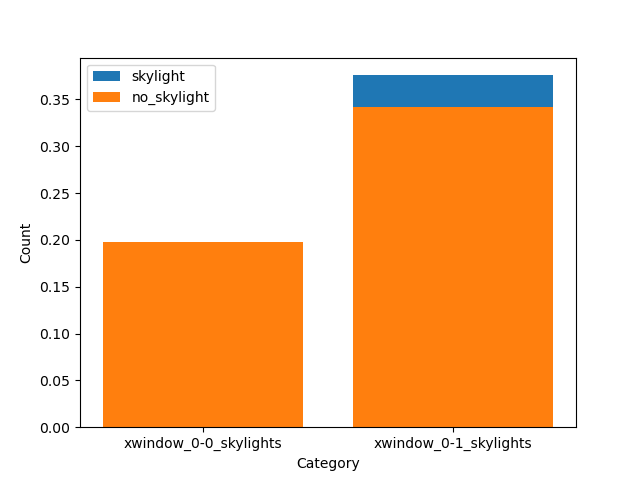

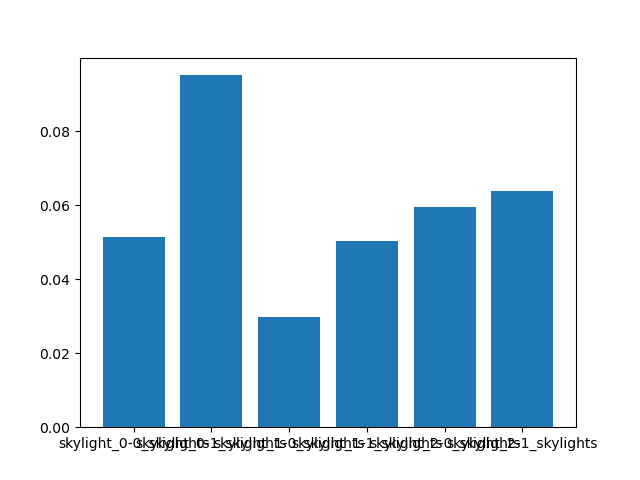

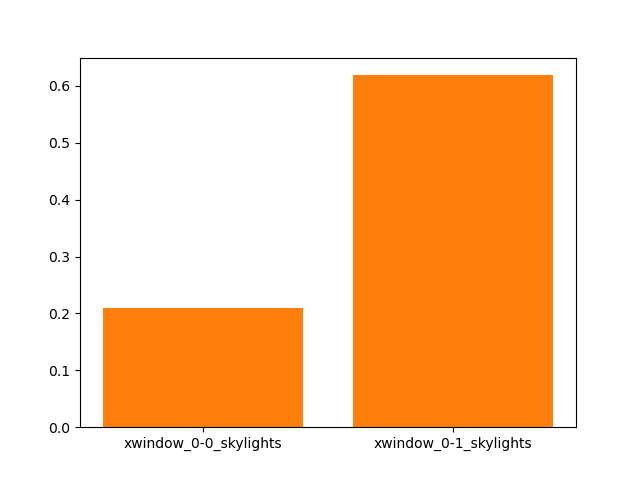

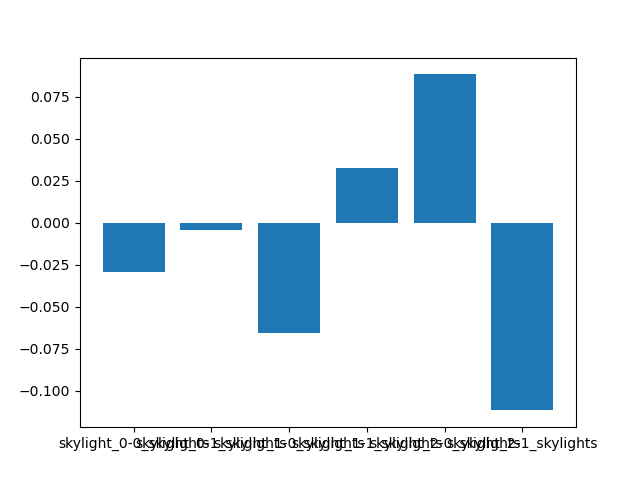

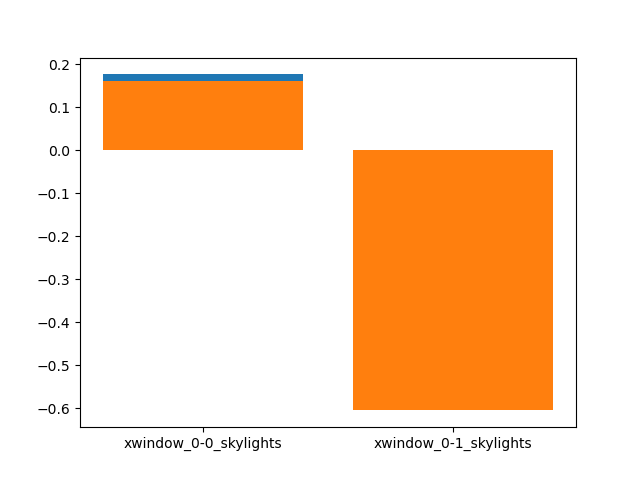

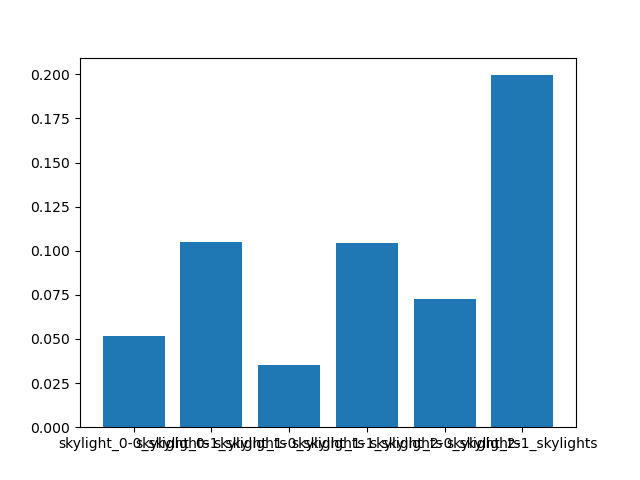

In [39]:
for table_name, df in data_dict['R2'].items():
    fig, ax = plt.subplots()
    no_skylight = []
    skylight = []
    for name in df.index.values:
        if "_skylight" in name:
            skylight.append(name)
        else:
            name = name.replace("_skylight", "")
            no_skylight.append(name)

    x = df.loc[skylight].index
    y = df.loc[skylight].values.flatten()
    ax.bar(x, y, label='skylight')
    if len(no_skylight) > 0:
        y = df.loc[no_skylight].values.flatten()
        ax.bar(x, y, label='no_skylight')
        

plt.xlabel('Category')
plt.ylabel('Count')
plt.legend()
plt.show()
plt.tight_layout()